# IRF - Uppsala Python Workshop: Snakes in Space 🐍
author: Louis Richard
e-mail: louisr@irfu.se
date: 29/02/2024

## Python for data analysis:
- Numpy (https://numpy.org/doc/stable/index.html, https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)
- Matplotlib (https://matplotlib.org/stable/tutorials/pyplot.html)
- Scipy (https://docs.scipy.org/doc/scipy/index.html)

## Numpy

In [2]:
import numpy as np  # convention, shorter, saves writing numpy all the time

### Create an array
numpy provides n-dimensional arrays, implemented at low-level for efficiency

In [34]:
my_array = np.random.random((3, 3))

# We can do maths directly with them
my_array *= 5.


another_array = np.zeros_like(my_array)
a_range = np.linspace(0., 1., 64)
another_range = np.arange(-1., 1., 0.1)

my_array

array([[4.38230581, 4.07200501, 1.90197776],
       [2.92363085, 0.04971818, 2.2235872 ],
       [3.50811361, 3.10404297, 2.36857064]])

In [31]:
my_array.astype(np.float32)

array([[4.0533414, 0.9879607, 1.3324144],
       [3.5060377, 1.2394149, 1.282555 ],
       [2.9916131, 3.5414846, 4.733258 ]], dtype=float32)

In [32]:
my_array.astype(np.int64)

array([[4, 0, 1],
       [3, 1, 1],
       [2, 3, 4]])

In [33]:
# Numpy arrays, like everything else, are objects, and have methods and attributes
print(f"{my_array.std() = }")
print(f"Number of dimensions = {my_array.ndim}, shape = {my_array.shape}")

my_array.std() = 1.3461038692267098
Number of dimensions = 2, shape = (3, 3)


In [48]:
# Broadcasting rules applied to numerical operations on ndarrays
# Length-1 dimensions get expanded in e.g. element-by-element multiplication

# You might want to check the shapes of these things to understand what is going on. 
id = np.identity(3)
scalar = 3. + 1.0j
vec = np.random.randn(8).reshape((8,1,1))

(my_array * vec[:,...] * id + scalar).shape

(8, 3, 3)

### Array slicing
To extract / set parts of an array, re-order, re-shape.  But, such operations (generally) create only a "view" of the original array, not a deep copy!


In [49]:
# What happens here?
new_array = my_array 
new_array = new_array[::-1, :]
new_array[1, 1] = 50
print(new_array)
print(my_array)

[[ 3.50811361  3.10404297  2.36857064]
 [ 2.92363085 50.          2.2235872 ]
 [ 4.38230581  4.07200501  1.90197776]]
[[ 4.38230581  4.07200501  1.90197776]
 [ 2.92363085 50.          2.2235872 ]
 [ 3.50811361  3.10404297  2.36857064]]


In [7]:
copy_array = my_array.copy() 
copy_array = copy_array[::-1, :]
copy_array[1, 1] = 10
print(copy_array, my_array)


[[ 0.52804931  0.80911579  0.8210062 ]
 [ 0.33164595 10.          0.06107297]
 [ 0.06135388  0.64595479  0.12943096]] [[ 0.06135388  0.64595479  0.12943096]
 [ 0.33164595 50.          0.06107297]
 [ 0.52804931  0.80911579  0.8210062 ]]


In [61]:
# Using "where" to search and index.  
my_array = np.random.random((3, 3))
inx = np.where(my_array > 0.5)
my_array[inx] = np.nan
print(my_array)

[[0.39514488        nan 0.21791041]
 [0.40587476        nan        nan]
 [0.1710329         nan 0.39155376]]


In [87]:
inx = np.isnan(my_array)
my_array[inx] = -1e99
my_array

array([[ 3.95144875e-01, -1.00000000e+99,  2.17910412e-01],
       [ 4.05874763e-01, -1.00000000e+99, -1.00000000e+99],
       [ 1.71032900e-01, -1.00000000e+99,  3.91553762e-01]])

### Operating on arrays

In [83]:
theta = np.deg2rad(30)
vec = np.array([1, 1, 1])
mat = np.array([
    [np.cos(theta), np.sin(theta), 0], 
    [-np.sin(theta), np.cos(theta), 0], 
    [0, 0, 1]])

# Applies the broadcasting rules.  Vec gets treated as 
mat * vec

array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [64]:
np.matmul(mat, vec)

array([ 0.8660254, -0.5      ,  0.       ])

In [11]:
r_mat = np.stack([np.array([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]]) for theta in np.random.rand(100)])

In [12]:
b = [1, 0, 0] * np.ones((100, 3))

In [13]:
m = np.random.rand(100, 3, 4, 5, 6, 8)
print(m[0, :, :, :, :, :].shape)
print(m[0].shape)
print(m[0, ...].shape)
print(m[..., 0].shape)
print(m[..., 0, :, :].shape)

(3, 4, 5, 6, 8)
(3, 4, 5, 6, 8)
(3, 4, 5, 6, 8)
(100, 3, 4, 5, 6)
(100, 3, 4, 6, 8)


In [14]:
np.matmul(r_mat[0, ...], b[0, :])

array([ 0.76911028, -0.63911609,  0.        ])

In [15]:
r_mat_b = np.matmul(r_mat, b[..., None])
print(r_mat.shape, b.shape, r_mat_b.shape)

(100, 3, 3) (100, 3) (100, 3, 1)


### datetime64

In [17]:
"2017-08-07T00:00:00.000000000"

'2017-08-07T00:00:00.000000000'

In [18]:
np.datetime64("2017-08-07T00:00:00.000000000").astype("datetime64[ns]")


numpy.datetime64('2017-08-07T00:00:00.000000000')

In [19]:
np.datetime64("2017-08-07T00:00:00.000000000").astype("datetime64[Y]")

numpy.datetime64('2017')

In [20]:
np.datetime64(0, "ns")

numpy.datetime64('1970-01-01T00:00:00.000000000')

In [21]:
print(np.datetime64(0, "ns"))
print(np.datetime64("1789-07-14T00:00:00.000000000").astype(int))
print(np.datetime64("1789-07-14T00:00:00.000000000").astype(np.int64))
print(np.datetime64("1789-07-14T00:00:00.000000000").astype(np.float64))

1970-01-01T00:00:00.000000000
-5694969600000000000
-5694969600000000000
-5.6949696e+18


In [22]:
np.datetime64("2017-08-07T00:00:00.000000000").astype("datetime64[Y]").astype("datetime64[m]")

np.datetime64("2017-08-07T00:00:00.000000000").astype(int)

1502064000000000000

---
## Matplotlib
Plotting library, heavily inspired by matlab (or, whatever matlab was like >>10 years ago)


https://matplotlib.org/stable/gallery/index.html

Text(0, 0.5, '$\\lambda_x$')

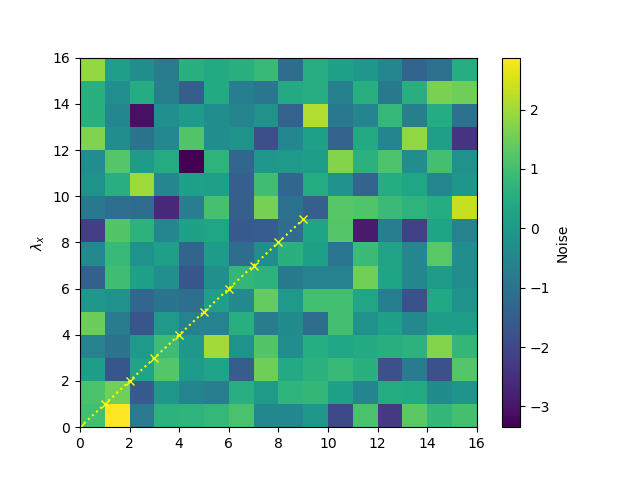

In [80]:
# For interactive use inside a notebook:
%matplotlib widget
import matplotlib.pyplot as plt  # The most matlab-like interface to matplotlib

fig = plt.figure()
plt.plot(np.arange(10), marker = 'x', linestyle=":", color='yellow')
plt.pcolormesh(np.random.randn(16*16).reshape(16,16))
plt.colorbar().set_label("Noise")
plt.ylabel(r"$\lambda_x$")
# plt.savefig("something.pdf")
# plt.savefig("something.png", dpi=300)

---
## SciPy
A comprehensive package for data analysis...
https://docs.scipy.org/doc/scipy/tutorial/index.html

In [69]:
from scipy.io import loadmat # To handle .mat files from matlab, for example
from scipy.signal import welch

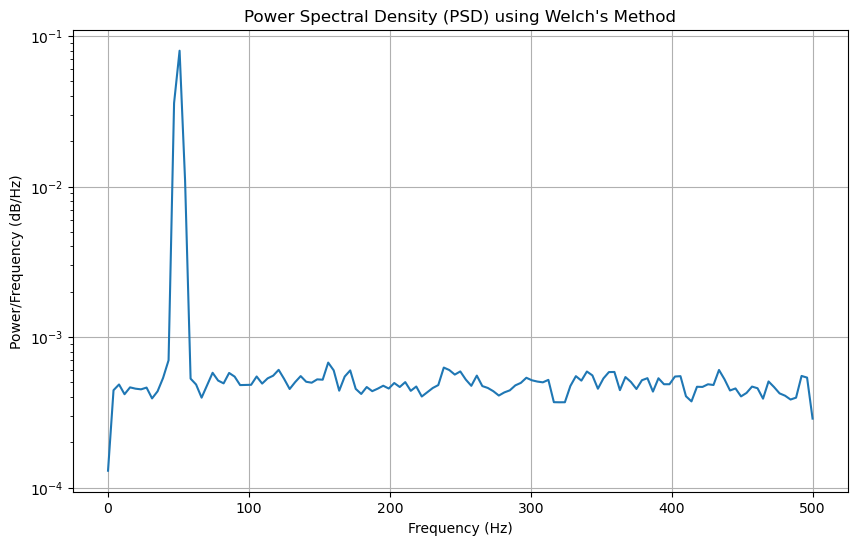

In [68]:
#  An example, putting all the above together:

# Generate a sample signal (sine wave with noise)
fs = 1000  # Sampling frequency
t = np.arange(0, 10, 1/fs)  # Time vector from 0 to 10 seconds
f1 = 50  # Frequency of the sine wave
signal = np.sin(2*np.pi*f1*t) + 0.5*np.random.randn(len(t))  # Signal with added noise

# Compute the Power Spectral Density (PSD) using Welch's method
frequencies, psd = welch(signal, fs=fs, nperseg=256)

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Power Spectral Density (PSD) using Welch\'s Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.grid(True)
plt.show()